# OBS:

Válvula A: -1

Válvula B: +1

In [1]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [43]:
valvulas_df = pd.read_csv('valvulas.csv')
a1 = valvulas_df['0.4329'] + valvulas_df['0.7022']
a1.rename('a1')
a2 = valvulas_df['-1.3719'] + valvulas_df['-0.8535']
a2.rename('a2')
a = pd.merge(a1, a2)
display(a)

ValueError: Cannot merge a Series without a name

In [ ]:
valvulas_test_df = pd.read_csv('valvulasTestes.csv')
display(valvulas_test_df)

,0.9694,0.6909,0.4334,3.4965,-1
0,0.5427,1.3832,0.6390,4.0352,-1
1,0.6081,-0.9196,0.5925,0.1016,1
2,-0.1618,0.4694,0.2030,3.0117,-1
3,0.1870,-0.2578,0.6124,1.7749,-1
4,0.4891,-0.5276,0.4378,0.6439,1
5,0.3777,2.0149,0.7423,3.3932,1
6,1.1498,-0.4067,0.2469,1.5866,1
7,0.9325,1.0950,1.0359,3.3591,1
8,0.5060,1.3317,0.9222,3.7174,-1
9,0.0497,-2.0656,0.6124,-0.6585,-1


In [4]:
scaler = preprocessing.MinMaxScaler()
X_train=valvulas_df.iloc[:, [0,1,2,3]].values
X_train=scaler.fit_transform(X_train)

X_test=valvulas_test_df.iloc[:, [0,1,2,3]].values
X_test=scaler.fit_transform(X_test)

In [5]:
y_train=valvulas_df.iloc[:, 4].values
y_test=valvulas_test_df.iloc[:, 4].values

In [6]:
# Testado com vários valores random_state. O valor 32 resulto em acurácia 1.0
p = Perceptron(random_state=42, eta0=0.001, alpha=0.00001, penalty='elasticnet', l1_ratio=0.05)
p.fit(X_train, y_train)

,penalty,'elasticnet'
,alpha,1e-05
,l1_ratio,0.05
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,eta0,0.001
,n_jobs,None
,random_state,42


In [7]:
train_predict = p.predict(X_train)
train_score = accuracy_score(train_predict, y_train)
print("Acurácia treinamento: ", train_score)
print(classification_report(train_predict, y_train))

Acurácia treinamento:  0.6470588235294118
              precision    recall  f1-score   support

        -1.0       0.89      0.62      0.73        26
         1.0       0.38      0.75      0.50         8

    accuracy                           0.65        34
   macro avg       0.63      0.68      0.61        34
weighted avg       0.77      0.65      0.67        34



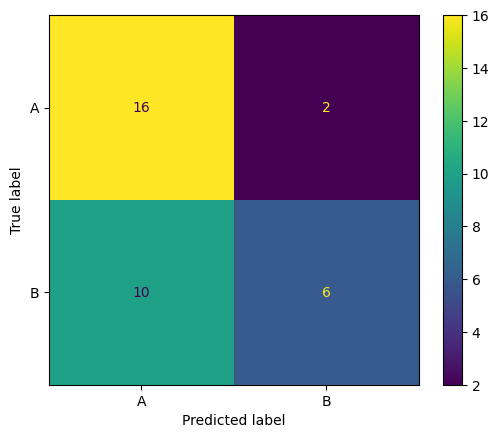

In [8]:
conf_matrix = confusion_matrix(y_train, train_predict)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['A','B'])
cm_display.plot()

In [9]:
test_predict = p.predict(X_test)
test_score = accuracy_score(test_predict, y_test)
print("Acurácia teste: ", test_score)
print(classification_report(test_predict, y_test))

Acurácia teste:  0.7857142857142857
              precision    recall  f1-score   support

        -1.0       1.00      0.70      0.82        10
         1.0       0.57      1.00      0.73         4

    accuracy                           0.79        14
   macro avg       0.79      0.85      0.78        14
weighted avg       0.88      0.79      0.80        14



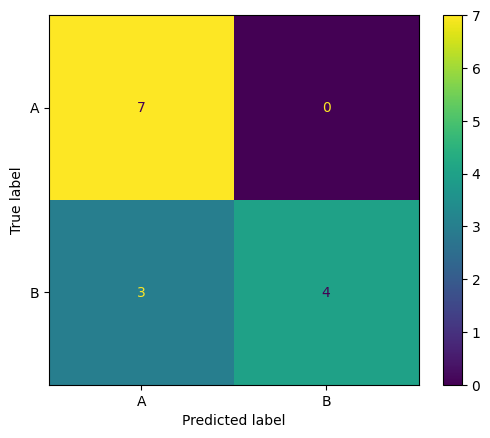

In [10]:
conf_matrix = confusion_matrix(y_test, test_predict)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['A','B'])
cm_display.plot()

In [11]:
# Verificar mais resultados de acurácia para obter um valor de acurácia preciso
from sklearn.model_selection import cross_val_score

scores = cross_val_score(p, X_train, y_train, cv=8)
print("Acurácias em cada fold: ", scores)
print("Acurácia média:", scores.mean())

Acurácias em cada fold:  [0.4  0.4  0.5  0.5  0.5  0.75 0.25 0.5 ]
Acurácia média: 0.475
